In [1]:
##create dataframes containing the data from the manual validated counts of cells in the images from the HO-1, IBA-1 and CD206 stained tissue

import pandas as pd
import numpy as np
import os
list_image_cd206= os.listdir('d:/D_lw/APromotion/Bilder/cd206 main/raw_clean without 40-7 pgl muko/')
list_cells_cd206= os.listdir('d:/D_lw/APromotion/Bilder/cd206 main/img_pos_musk/')

list_image_iba1= os.listdir('d:/D_lw/APromotion/Bilder/iba1 main/raw_update/')
list_cells_iba1= os.listdir('d:/D_lw/APromotion/Bilder/iba1 main/img_pos_musk/')


#für ho1
list_image_ho1= os.listdir('d:/D_lw/APromotion/Bilder/ho1 main/img_raw/')
list_cells_ho1= os.listdir('d:/D_lw/APromotion/Bilder/ho1 main/img_pos_all/')
list2=[]

def create_dataframe(list_image, list_cells):        
    list_image = [x[:29].lower() for x in list_image]
    list_cells = [x[:29].lower() for x in list_cells]

    df = pd.DataFrame(list_image ,columns= ['image'])

    df['short_image'] = df['image'].str[:7]


    df['portion'] = df['short_image'].str[5:7]
    df['animal'] = df['short_image'].str[:2]
    df['slide'] = df['short_image'].str[3]
    df['layer'] = df['image'].apply(lambda x: 'musk' if 'musk' in x else 'muco')
    df['genotype'] = df['animal'].apply(lambda x: 'WT' if int(x) in [36,38,41,43,45] else 'TG')
    df['cell_count'] = df['image'].apply(lambda x: list_cells.count(x))

    #print(df)
    print('all cells counted:', df['cell_count'].sum())

    df_musk = df.loc[df['layer']=='musk', ['image','short_image','genotype','animal', 'portion', 'cell_count']]
    #print(df_musk)

    df_slide = df_musk.groupby(['short_image']).agg({'cell_count': ['mean']}).reset_index()
    #df_slide['animal'] = df_slide['short_image'].str[:2]
    #df_slide['genotype'] = df_slide['animal'].apply(lambda x: 'WT' if int(x) in [36,38,41,43,45] else 'TG')
    #df_slide['portion'] = df_slide['short_image'].str[5:7]
    df_slide.columns = ['slide', 'mean_count']


    return df_slide




df_iba1 = create_dataframe(list_image_iba1, list_cells_iba1)
df_cd206 = create_dataframe(list_image_cd206, list_cells_cd206)
df_ho1 = create_dataframe(list_image_ho1, list_cells_ho1)


all cells counted: 7504
all cells counted: 4497
all cells counted: 16928


In [2]:
##merging the data from the different stains based on the sampling location

import matplotlib.pyplot as plt
list_slide =[]

for i in df_iba1['slide']:
    if i not in list_slide:
        list_slide.append(i)

for i in df_cd206['slide']:
    if i not in list_slide:
        list_slide.append(i)
                
for i in df_ho1['slide']:
    if i not in list_slide:
        list_slide.append(i)
print(len(list_slide))
df_slide_merge_ho1_iba1 =df_ho1.merge(df_iba1, on = 'slide')
df_slide_merge_ho1_iba1.columns = ['slide', 'ho1', 'iba1']

df_slide_merge_ho1_cd206 =df_ho1.merge(df_cd206, on = 'slide')
df_slide_merge_ho1_cd206.columns = ['slide', 'ho1', 'cd206']


df_slide_merge_iba1_cd206 =df_iba1.merge(df_cd206, on = 'slide')
df_slide_merge_iba1_cd206.columns = ['slide', 'iba1', 'cd206']



61


            ho1      iba1     cd206      ckit
ho1    1.000000  0.287517  0.183491  0.180496
iba1   0.287517  1.000000  0.377998  0.242861
cd206  0.183491  0.377998  1.000000 -0.157506
ckit   0.180496  0.242861 -0.157506  1.000000


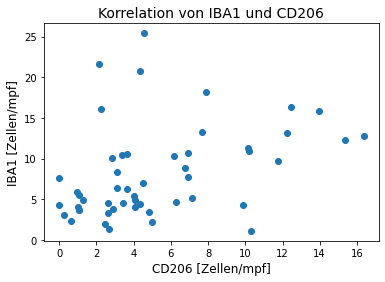

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## load manual counts of ICC and calculate correlation matrix
# Sample DataFrame (Replace this with your actual DataFrame)
df_slide_merge_ho1_iba1 =df_ho1.merge(df_iba1, on = 'slide')
df_merge_all0 = df_slide_merge_ho1_iba1.merge(df_cd206, on ='slide')
# Replace "data.csv" with the actual file path of your CSV file
file_path = "ckit_counts.csv"

# Read the CSV file into a pandas DataFrame
df_ckit = pd.read_csv(file_path, delimiter = ';')



df_merge_all = df_merge_all0.merge(df_ckit, on ='slide')
#print(df_merge_all)




df_merge_all.columns = ['slide', 'ho1', 'iba1', 'cd206', 'ckit']

# Calculate the correlation matrix for the three columns
correlation_matrix = df_merge_all.corr()

print(correlation_matrix)

#create scatter plot
plt.scatter(df_merge_all['cd206'], df_merge_all['iba1'])

# Add labels and title
plt.xlabel('CD206 [Zellen/mpf]', fontsize = 12)
plt.ylabel('IBA1 [Zellen/mpf]', fontsize = 12)
plt.title('Korrelation von IBA1 und CD206', fontsize = 14)

# Show the plot
plt.show()
